## Introduction to Binary Search
A searching algorithm is a limited search space. Only applicable when sorted.

### Find X in a sorted array
Consider the sorted array [3,4,6,7,9,12,16,17]  
We have to find 6  
The below shows how to find 6 using binary search
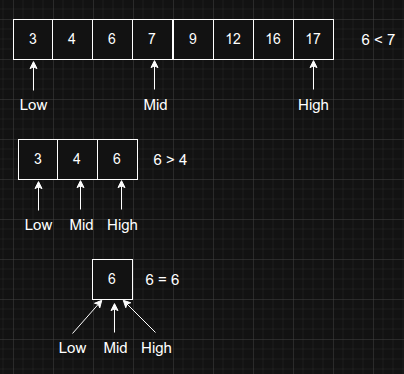

In [1]:
arr = [3,4,6,7,9,12,16,17]
target = 6
low = 0
high = len(arr) - 1
while low <= high:
    mid = int((low+high)/2)
    if arr[mid] == target:
        print(mid)
        break
    elif target > arr[mid]:
        low = mid+1
    else:
        high = mid-1
print(-1)

2
-1


In [8]:
# Using Recursion
def binarySearch(arr,low,high,target):
    if low > high:
        return -1
    mid = int((low+high)/2)
    if arr[mid] == target:
        return mid
    elif target > arr[mid]:
        return binarySearch(arr,mid+1,high,target)
    return binarySearch(arr,low,mid-1,target)

arr = [3,4,6,7,9,12,16,17]
target = 12

print(binarySearch(arr,0,len(arr)-1,target))

5


#### Time Complexity
We are divide the array into 2 for every iteration  
The time complexity is O(log<sub>2</sub> n)

### Lower Bound
The smallest index such that the number at that index is greater than or equal to the given number.  
Consider the array [3,5,8,15,19]  
Ex: x = 9, here 5 >= 9 at index 3 so 3 is the lower bound.  
If none of the element satisfy  the condition, then size of the array is the lower bound.

#### Using binary search
Consider the below array and x = 1  
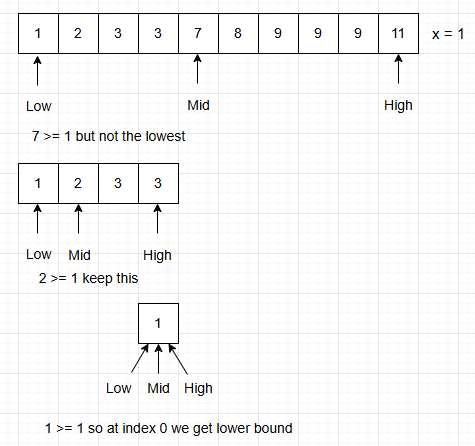

In [ ]:
# Using binary search
arr = [1,2,3,3,7,8,9,9,9,11]
target = 1
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] >= target:
        ans = mid
        high = mid-1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

0


### Upper Bound
The smallest index such that arr[index] > x.

In [4]:
# Using binary search
target = 6
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] > target:
        ans = mid
        high = mid -1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

4
